100
10
7
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

'\nfor i in range(iterations):\n    for x in trainListe:\n        y = output(x) # y neu berechnen \n        \n        # Trainieren des Netzes mit der Delta-Regel\n        train()\n\n#Netzausgabe berechnen\n\nresult=[]\n\nfor x in testListe:\n    \n    y=output(x)\n    \n    #print(y)\n     \n    #Ergebnisliste\n    result.append(round(y))\n\n#Auswertung\nr = 0\nfor i in range( len(testListe) ):\n    if round(testListe[i][15])==result[i]:\n       r = r+1 \n    \nprint("\nRichtig: ",r, " das sind ", round( r/len(testListe) * 100), "%" )\n\n#print(wil)\n'

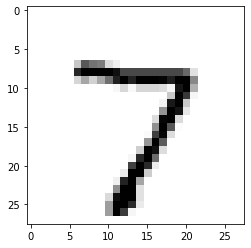

In [3]:
"""
Klassifizierung der Appendix-Datensätze mit mehrschichtigem Netz 15x8x1 und Sigmoid
"""
import numpy as np
import matplotlib.pyplot
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def output(x):
  #Berechnen des Ausgabewertes y

    global hL
    hL = sigmoid(np.dot(wil,x))
    
    oL = sigmoid(np.dot(wol, hL))
    
    return oL
    
    
def train():
    # Ein Durchlauf mit Fehlerrückführung
    #Zielwert
    t = x[15]
  
    #Backropagation-Alg. für die Outputschicht
    for i in range( len(wol) ):
        delta = eta * hL[i] * ( t - y ) * y * (1-y)
       
        wol[i] = wol[i] + delta

    #Gewichtsanpassung für die erste Schicht
    error = t-y
    
    #Fehler der mittleren Schicht
    e = np.zeros([8])  #(0,0,0,0)
    
    summe = 0
    
    for i in range( len(e) ):
        summe = summe + wol[i]
    
    for i in range( len(e) ):
        e[i] = wol[i] / summe * error
        
    #Backropagation-Alg. für erste Schicht
    for j in range( len(wol) ):
        for i in range( len(wil) ):
            delta = eta * x[i] * e[j] * hL[j] * (1 - hL[j])
       
            wil[i,j] = wil[i,j] + delta   
            
"""
Hauptteil
"""

# Gewichtematrix InputLayer 15x8, Gewichte OutputLayer
# Füllen mit Zufallszahlen
wil=np.random.rand(100,784) -0.5
wol=np.random.rand(10,100) -0.5

print(len(wil))
print(len(wol))

#Testdatei einlesen
datafile = open("Digit_7.csv",'r')
datalist = datafile.readlines();
datafile.close()

#Die Zahl
position = 0
print(datalist[position][0])

#Bild zeichnen
values = datalist[position].split(',')
image = np.asfarray( values[1:]).reshape((28,28))
matplotlib.pyplot.imshow( image, cmap='Greys',interpolation='None')

#Abschneiden der ersten Ziffer
input = (np.asfarray( values[1:]))
print(input)

#Lernrate
eta = 0.01; iterations =80 ;


print("\nTraining!\n")

"""
for i in range(iterations):
    for x in trainListe:
        y = output(x) # y neu berechnen 
        
        # Trainieren des Netzes mit der Delta-Regel
        train()

#Netzausgabe berechnen

result=[]

for x in testListe:
    
    y=output(x)
    
    #print(y)
     
    #Ergebnisliste
    result.append(round(y))

#Auswertung
r = 0
for i in range( len(testListe) ):
    if round(testListe[i][15])==result[i]:
       r = r+1 
    
print("\nRichtig: ",r, " das sind ", round( r/len(testListe) * 100), "%" )

#print(wil)
"""